<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB1/blob/main/6351071072_LAB1_BAI6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend

In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import csv
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import warnings
warnings.filterwarnings('ignore')
dataset = []
with open('groceries.csv', 'r') as f:
      reader = csv.reader(f)
      for row in reader:
          dataset.append(row)
print(f"Đã đọc {len(dataset)} giao dịch.")

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("Kích thước dữ liệu One-Hot:", df.shape)
print(df.head())

Đã đọc 9835 giao dịch.
Kích thước dữ liệu One-Hot: (9835, 169)
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  v

In [5]:
#câu a
print("Nguyễn Đức Trung _ 6351071072")
min_sup_range = [0.01, 0.03, 0.05, 0.07, 0.1]
times_apriori = []

print(f"{'Min Support':<15} | {'Apriori Time (s)':<15}")
print("-" * 35)

for sup in min_sup_range:
    start_time = time.time()

    apriori(df, min_support=sup, use_colnames=True, low_memory=True)

    end_time = time.time()
    exec_time = end_time - start_time
    times_apriori.append(exec_time)

    print(f"{sup:<15} | {exec_time:<15.4f}")

Nguyễn Đức Trung _ 6351071072
Min Support     | Apriori Time (s)
-----------------------------------
0.01            | 0.1409         
0.03            | 0.0390         
0.05            | 0.0239         
0.07            | 0.0191         
0.1             | 0.0124         


In [6]:
#Câu b
print("Nguyễn Đức Trung _ 6351071072")
times_fpgrowth = []
print(f"{'Min Support':<15} | {'FP-Growth Time (s)':<15}")
print("-" * 35)

for sup in min_sup_range:
    start_time = time.time()

    fpgrowth(df, min_support=sup, use_colnames=True)

    end_time = time.time()
    exec_time = end_time - start_time
    times_fpgrowth.append(exec_time)

    print(f"{sup:<15} | {exec_time:<15.4f}")

Nguyễn Đức Trung _ 6351071072
Min Support     | FP-Growth Time (s)
-----------------------------------
0.01            | 14.7402        
0.03            | 1.2096         
0.05            | 0.1604         
0.07            | 0.0976         
0.1             | 0.0585         


Nguyễn Đức Trung _ 6351071072


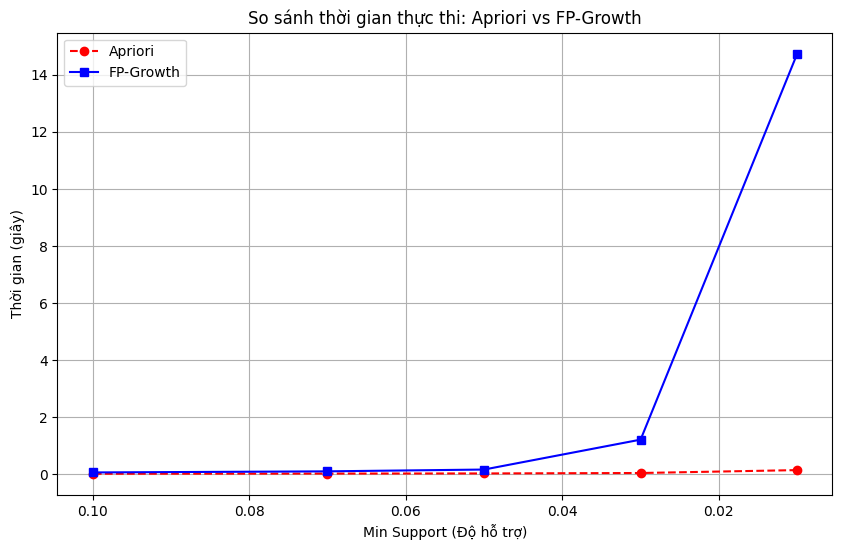

In [8]:
#Câu c
print("Nguyễn Đức Trung _ 6351071072")
plt.figure(figsize=(10, 6))
plt.plot(min_sup_range, times_apriori, marker='o', label='Apriori', color='red', linestyle='--')
plt.plot(min_sup_range, times_fpgrowth, marker='s', label='FP-Growth', color='blue')

plt.title('So sánh thời gian thực thi: Apriori vs FP-Growth')
plt.xlabel('Min Support (Độ hỗ trợ)')
plt.ylabel('Thời gian (giây)')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()
